In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Thư Viện


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Đọc dữ liệu

In [3]:
import os

In [4]:
cd /content/drive/MyDrive/chuyen de

/content/drive/MyDrive/chuyen de


In [5]:
ls

KLTN/


In [8]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/CDTN K2 Chủ đề 9/KLTN.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/chuyen de')

# Hiển thị danh sách các tệp sau khi giải nén

In [9]:
print("Các tệp sau khi giải nén:")
print(os.listdir('/content/drive/MyDrive/chuyen de/KLTN'))

Các tệp sau khi giải nén:
['a599db325c0ea95a5d2cbf166bd4f146.csv', 'a594c8d0fc2c32143904e2250c97a3b9.csv', 'a5aa25da0716b23ef6e45eea0c45fdf8.csv', 'a5b7be1abd02893d5d38fafb88803c47.csv', 'a5d33fafe0df4d1fe044c3e8909374e5.csv', 'a5f45f247ea4a498913a6383ef88fdaa.csv', 'a6124bb49c6afa1e5f1cf53d3359194d.csv', 'a5fe6ecab589b57be4f20d0afc7b10df.csv', 'a6143f9f1eed168bd494b4ca898dd3a4.csv', 'a6346859f48ca0b37e60d1c1c8d2d6f3.csv', 'a621cabbb45fb0710c7f442e8c1304f6.csv', 'a6388df7b041a3c7f96f9ba63fc71f4d.csv', 'a66d9f81d66c0a23a013274eb0fde48f.csv', 'a6916dca4424fbcc1f9bd93db6f382a3.csv', 'a6aba593c9ebcd200c6322fd3d8842d7.csv', 'a6a5161f0b12299bba9f587ac06585e5.csv', 'a67746facb6d94e5b2838b7a7a993887.csv', 'a6b29387b581e7f10a86ab4cf5bd237b.csv', 'a6c1c393ab2e59691f1644a226fa4ada.csv', 'a6d27bf48ae80c8eb4140b07bffa9d77.csv', 'a6da56caad1dbc54e468500a131b27f2.csv', 'a6f5d83206fb33d71f9dd19d2dffc8b3.csv', 'a7060a33acda4c07f718f8482d01727b.csv', 'a71177be742d2f60fa6665599d257a2d.csv', 'a6ff17e1fa01

In [10]:
len(os.listdir('/content/drive/MyDrive/chuyen de/KLTN'))

2900

In [11]:
data = os.listdir('/content/drive/MyDrive/chuyen de/KLTN')

In [12]:
cd KLTN

/content/drive/MyDrive/chuyen de/KLTN


In [13]:
df= pd.read_csv(data[1])

In [14]:
df.columns

Index(['Mã HP', 'Tên HP', 'Điểm', 'Số TC'], dtype='object')

In [15]:
df_new = df.pivot_table(values='Điểm', columns= ['Tên HP','Số TC'])

In [16]:
df_new = df_new.reset_index(drop=True)

In [17]:
df_new.columns.get_level_values('Số TC')

Index([1, 1, 1, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3], dtype='int64', name='Số TC')

In [18]:
def calculate_gpa(df_new):
  tong_diem = 0
  tong_tin = 0
  mon_chua_qua = []

  mon_ = df_new.columns.get_level_values('Tên HP')
  tin_ = df_new.columns.get_level_values('Số TC')

  for i in range(len(tin_)):
    diem = df_new.iloc[0]
    if diem[i] > 4.0 :
      tong_diem += diem[i]*tin_[i]
      tong_tin += tin_[i]
    # else :
    #   mon_chua_qua.append([mon_[i],tin_[i]])

  # print('Tổng tín đã học qua : ',tong_tin)
  # for v in mon_chua_qua :
  #   print('Môn chưa qua :',v[0] ,', TC :',v[1])
  if tong_tin <= 0 : return 0
  gpa =  tong_diem / tong_tin
  return gpa



In [19]:
df_new['GPA'] = calculate_gpa(df_new)

In [20]:
df_new

Tên HP,GDQP: Công tác quốc phòng - an ninh,GDQP: Kỹ thuật bắn súng,GDQP: Quân sự chung,GDQP: Đường lối quân sự của Đảng,Khoa học môi trường,Kinh tế chính trị và CNXH khoa học,"Logic, suy luận toán học và kỹ thuật đếm",Ngôn ngữ lập trình,Pháp luật đại cương,Số và cấu trúc đại số,Tin đại cương,Tiếng Việt thực hành,Triết học Mác – Lênin,Đại số tuyến tính,GPA
Số TC,1,1,1,1,2,3,3,3,2,2,2,2,2,3,
0,-1.0,1.8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0


In [21]:
dfs = []
for file_path in data:
    df = pd.read_csv(file_path)
    df_new = df.pivot_table(values='Điểm', columns= ['Tên HP','Số TC'])
    df_new = df_new.reset_index(drop=True)
    df_new['GPA'] = calculate_gpa(df_new)
    dfs.append(df_new)

In [22]:
dfs[9]

Tên HP,Chủ nghĩa xã hội khoa học,Công dân số,Công nghệ Web,Công nghệ phần mềm,Cơ sở dữ liệu,Cấu trúc dữ liệu,Dữ liệu lớn,Dự án Công nghệ thông tin,Giải tích 1,Giải tích 2,...,Tiếng Pháp 1,Tiếng Pháp 2,Tiếng Việt thực hành,Toán rời rạc,Triết học Mác - Lênin,Trí tuệ nhân tạo và công nghệ tri thức,Tư tưởng Hồ Chí Minh,Xác suất thống kê ứng dụng,Đại số tuyến tính,GPA
Số TC,2,2,3,2,3,3,2,2,3,3,...,2,2,2,3,3,3,2,4,3,
0,8.9,5.7,8.5,2.5,5.2,5.4,9.3,2.7,7.1,5.8,...,9.4,9.0,7.6,6.6,9.2,6.9,8.9,7.0,6.8,7.76


In [23]:
merged_df = pd.concat(dfs)

In [24]:
merged_df = merged_df.reset_index(drop=True)

# Tìm ra các bạn học AI

In [25]:
(merged_df.index[merged_df['Thị giác máy tính'].notna().any(axis=1)])

Index([ 144,  200,  323,  341,  492,  573,  606,  754,  793,  845,  860,  964,
       1053, 1068, 1129, 1151, 1235, 1242, 1258, 1308, 1450, 1514, 1530, 1558,
       1621, 1622, 1770, 1818, 2012, 2086, 2140, 2189, 2204, 2223, 2300, 2343,
       2359, 2389, 2395, 2462, 2533, 2823, 2879],
      dtype='int64')

In [26]:
len_ = len(merged_df.index[merged_df['Thị giác máy tính'].notna().any(axis=1)])

Lọc ra những cột có chứa giá trị không bị NaN ít nhất là 10

In [27]:
AI_ = merged_df.iloc[merged_df.index[merged_df['Thị giác máy tính'].notna().any(axis=1)],:].dropna(axis=1, thresh= len_- 33)

In [28]:
col_move = AI_.pop('GPA')
AI_['GPA'] = col_move

In [29]:
AI_.isna().sum()

Tên HP                                    Số TC
Cơ sở dữ liệu                             3         0
Giải tích 1                               3         1
Khoa học môi trường                       2         0
Kỹ thuật số                               2         3
Logic, suy luận toán học và kỹ thuật đếm  3         0
                                                   ..
Thống kê nâng cao                         3         1
Thực tập ngành Trí tuệ nhân tạo           3        11
Xử lý ngôn ngữ tự nhiên                   3         6
KLTN ngành Trí tuệ nhân tạo               6        32
GPA                                                 0
Length: 62, dtype: int64

In [30]:
AI_

Tên HP,Cơ sở dữ liệu,Giải tích 1,Khoa học môi trường,Kỹ thuật số,"Logic, suy luận toán học và kỹ thuật đếm",Lập trình hướng đối tượng,Ngôn ngữ lập trình,Nhập môn kinh tế học,Pháp luật đại cương,Tin đại cương,...,Nhập môn trí tuệ nhân tạo,Tiếng Trung 1,CĐTN: Ngành Trí tuệ nhân tạo,Học sâu,Thị giác máy tính,Thống kê nâng cao,Thực tập ngành Trí tuệ nhân tạo,Xử lý ngôn ngữ tự nhiên,KLTN ngành Trí tuệ nhân tạo,GPA
Số TC,3,3,2,2,3,3,3,2,2,2,...,3,2,6,3,3,3,3,3,6,
144,5.7,6.7,8.7,5.4,5.4,5.4,7.1,9.0,8.6,8.8,...,NaN,NaN,0.0,8.7,8.2,2.6,9.0,6.6,NaN,6.878992
200,8.5,5.9,8.5,8.5,8.0,10.0,9.7,8.2,9.4,8.8,...,9.5,NaN,NaN,9.0,9.5,9.3,NaN,8.3,NaN,8.402586
323,8.5,6.7,10.0,10.0,7.1,10.0,6.7,7.1,9.1,8.8,...,NaN,NaN,NaN,7.1,9.7,9.0,9.0,9.0,0.0,8.232824
341,4.0,5.7,5.3,8.3,6.2,10.0,6.9,7.6,5.8,9.6,...,NaN,NaN,NaN,8.7,8.0,3.4,9.0,7.0,0.0,7.612195
492,6.0,5.5,9.3,10.0,8.0,10.0,7.9,5.6,8.9,8.2,...,NaN,4.5,0.0,8.7,8.2,5.0,8.0,4.9,NaN,7.376378
573,5.0,7.9,9.2,8.4,8.5,8.0,5.8,6.8,6.2,7.3,...,NaN,NaN,NaN,8.0,8.3,4.0,0.0,-1.0,NaN,7.213592
606,5.5,6.4,6.8,5.5,8.3,10.0,8.8,6.0,9.3,9.2,...,NaN,6.6,NaN,6.8,8.3,4.8,0.0,5.5,NaN,7.519512
754,5.5,4.4,9.9,4.2,6.4,8.8,6.7,5.1,9.1,7.9,...,NaN,5.9,0.0,8.7,8.7,3.3,0.0,2.4,NaN,7.168750
793,7.1,5.2,9.0,9.2,8.0,10.0,8.1,9.0,9.7,9.1,...,6.5,NaN,NaN,9.3,9.0,4.6,0.0,8.3,NaN,7.306481


# Sử dụng PCA


- Những môn bị NaN thì điền là -1

In [31]:
X = AI_.drop(columns=('GPA','')).fillna(-1)
y = AI_['GPA']

In [32]:
pca = PCA(n_components=0.90)
pca.fit(X)

PCA(n_components=0.9)

In [33]:
pca.explained_variance_ratio_

array([0.24568208, 0.1183461 , 0.08812978, 0.07421606, 0.06565468,
       0.05599501, 0.04204173, 0.0359517 , 0.03066084, 0.0275992 ,
       0.02506503, 0.02339291, 0.02117511, 0.01767177, 0.01567726,
       0.01455853])

In [34]:
pca.n_components_

16

## Xem mức độ ảnh hưởng của từng đặc trưng đến các thành phần chính

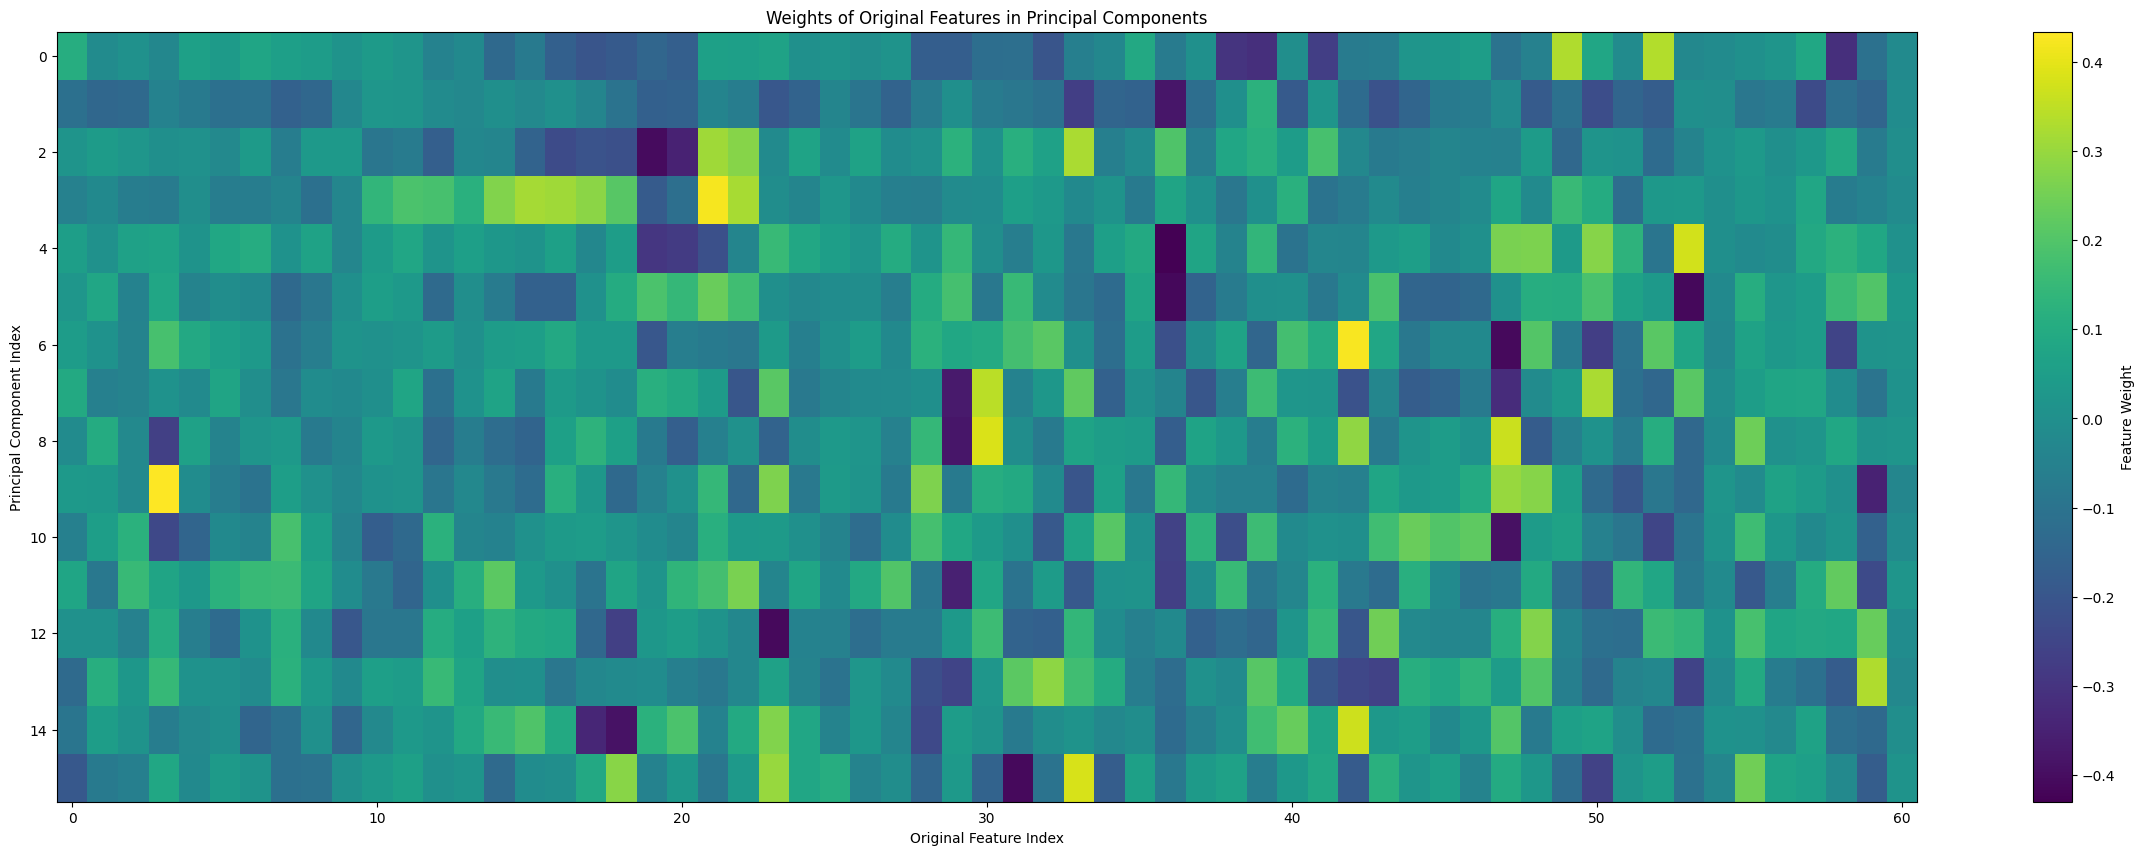

In [35]:
weights = pca.components_

plt.figure(figsize=(30, 10))
plt.imshow(weights , cmap='viridis', aspect='auto')
plt.colorbar(label='Feature Weight')
plt.xlabel('Original Feature Index')
plt.ylabel('Principal Component Index')
plt.title('Weights of Original Features in Principal Components')
plt.show()

Những đặc trưng có ảnh hưởng tới các thành phần chính theo PCA :

In [36]:
AI_.columns[np.unique(np.where((weights[:]>0.3) | (weights[:]< -0.3))[1])]


MultiIndex([(                           'Kỹ thuật số', 2),
            (              'Tiếng Anh sơ trung cấp 3', 2),
            (                 'Tiếng Anh trung cấp 1', 2),
            (                 'Tiếng Anh trung cấp 2', 2),
            (                 'Tiếng Anh trung cấp 3', 2),
            (                          'Tiếng Nhật 1', 2),
            (                          'Tiếng Nhật 2', 2),
            (                          'Tiếng Pháp 1', 2),
            (                          'Tiếng Pháp 2', 2),
            (                  'Tiếng Việt thực hành', 2),
            (                    'Hệ thống thông tin', 3),
            (                      'Khai phá dữ liệu', 3),
            (                    'Kiến trúc máy tính', 3),
            (                           'Dữ liệu lớn', 2),
            (                          'Kỹ năng sống', 3),
            ('Trí tuệ nhân tạo và công nghệ tri thức', 3),
            (                         'Công nghệ Web', 3

# Tìm đặc trưng quan trọng bằng RandomForest

In [37]:
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
feature_importances = model.feature_importances_

# Chọn các đặc trưng có ảnh hưởng lớn đến biến mục tiêu
important_features_indices = np.argsort(feature_importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
important_features = X.columns[important_features_indices]

print("Các đặc trưng quan trọng:")
print(important_features[:pca.n_components_])

Các đặc trưng quan trọng:
MultiIndex([(                       'Thống kê nâng cao', 3),
            (                           'Cơ sở dữ liệu', 3),
            (                      'Ngôn ngữ lập trình', 3),
            (                        'Cấu trúc dữ liệu', 3),
            (                                 'Học máy', 3),
            (               'Nhập môn khoa học dữ liệu', 2),
            (               'Nhập môn trí tuệ nhân tạo', 3),
            (                       'Thị giác máy tính', 3),
            ('Logic, suy luận toán học và kỹ thuật đếm', 3),
            (          'Phát triển ứng dụng với Python', 3),
            (                 'Xử lý ngôn ngữ tự nhiên', 3),
            (               'Lập trình hướng đối tượng', 3),
            (                              'Tối ưu hóa', 2),
            (                    'Tư tưởng Hồ Chí Minh', 2),
            (                       'Đại số tuyến tính', 3),
            (                     'Pháp luật đại cương', 2)

# Huấn luyện lại bằng các đặc trưng quan trọng



In [39]:
X_train = X_train[important_features[:pca.n_components_]]
X_test = X_test[important_features[:pca.n_components_]]

model.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse

0.055451918706556205

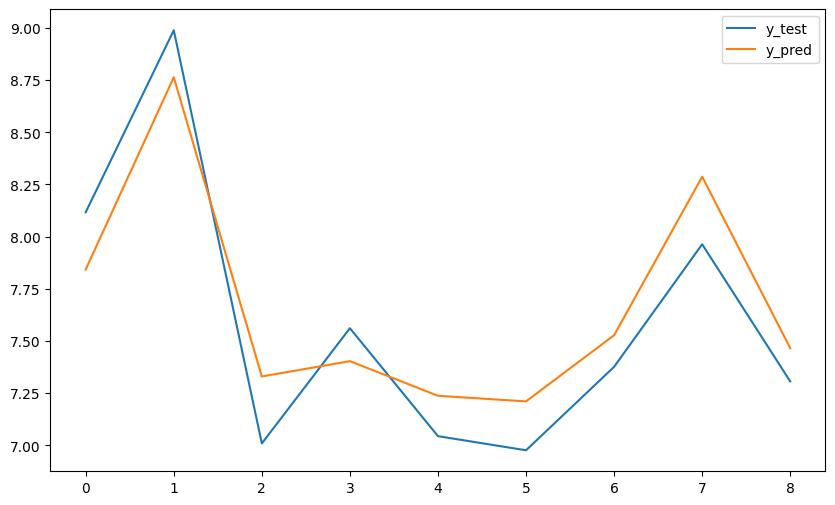

In [41]:
plt.figure(figsize=(10, 6))

plt.plot(np.array(y_test),label='y_test')
plt.plot(model.predict(X_test),label='y_pred')
plt.legend()

plt.show()

# Giữ mức MSE và lần lượt xóa đi các cột

In [69]:
# removed_features = []
# cur_mse = mse

# for i in range(shape_):
#     # Lấy độ quan trọng của các đặc trưng
#     feature_importances = model.feature_importances_

#     # Tìm đặc trưng có độ quan trọng thấp nhất và loại bỏ
#     least_important_feature_idx = np.argmin(feature_importances)
#     removed_features.append(X_train.columns[least_important_feature_idx])

#     X_train = X_train.drop(columns=X_train.columns[least_important_feature_idx])
#     X_test =  X_test.drop(columns=X_test.columns[least_important_feature_idx])

#     # Huấn luyện lại mô hình
#     model.fit(X_train, y_train)

#     # Đánh giá độ chính xác mới
#     new_mse = mean_squared_error(y_test, model.predict(X_test))
#     # Kiểm tra
#     if cur_mse - new_mse >= 0.01:
#       print("Độ chính xác trên tập kiểm tra sau khi loại bỏ các đặc trưng:", new_mse)
#       break

# print("Các đặc trưng đã loại bỏ:", removed_features)

# Lọc ra các bạn ra trường


In [43]:
col_KLTN = merged_df.filter(regex='KLTN').columns

In [44]:
merged_df.index[merged_df[col_KLTN].notna().any(axis=1)]

Index([   5,    6,   36,   43,   45,   48,   77,   93,  113,  122,
       ...
       2651, 2662, 2727, 2806, 2824, 2838, 2843, 2845, 2876, 2879],
      dtype='int64', length=113)

In [45]:
merged_df.index[merged_df[merged_df.filter(regex='CĐTN').columns].notna().any(axis=1)]

Index([   2,    7,   24,   27,   46,   48,   55,   67,   70,   73,
       ...
       2831, 2840, 2850, 2859, 2864, 2874, 2883, 2885, 2886, 2890],
      dtype='int64', length=431)

In [46]:
col_KLTN

MultiIndex([(                     'KLTN: Toán ứng dụng', 6),
            (                         'KLTN ngành CNTT', 6),
            (            'KLTN ngành Khoa học máy tính', 6),
            (           'KLTN ngành Hệ thống thông tin', 6),
            (             'KLTN ngành Trí tuệ nhân tạo', 6),
            ('KLTN ngành Truyền thông và mạng máy tính', 6),
            (             'KLTN chuyên ngành Ngân hàng', 6)],
           names=['Tên HP', 'Số TC'])

In [47]:
merged_df.filter(regex='CĐTN').columns


MultiIndex([(                            'CĐTN: Cơ sở dữ liệu', 6),
            (               'CĐTN: Hệ thống thông tin quản lý', 6),
            (                      'CĐTN: Phát triển phần mềm', 6),
            (            'CĐTN: Hoạt động tín dụng trong NHTM', 2),
            (           'CĐTN: Tiền tệ và hoạt động ngân hàng', 2),
            (                                 'CĐTN: Đấu thầu', 2),
            (             'CĐTN: Hệ thống thông tin ngân hàng', 6),
            (           'CĐTN : Truyền thông và mạng máy tính', 6),
            (                             'CĐTN: An toàn mạng', 6),
            (            'CĐTN: Hoạt động tín dụng trong NHTM', 3),
            (           'CĐTN: Tiền tệ và hoạt động ngân hàng', 3),
            (                   'CĐTN: Ngành Trí tuệ nhân tạo', 6),
            (               'CĐTN: Lý luận về công tác xã hội', 3),
            (          'CĐTN: Thực hành trong công tác xã hội', 3),
            (                'CĐTN: Các giải phá

In [48]:
merged_df['KLTN: Toán ứng dụng', 6].notna().sum()


11

# Dữ liệu giả

In [49]:
# num_features = 50

# num_samples = 1000
# data1 = np.random.uniform(7.0, 10.0, size=(500, num_features))
# data2 = np.random.uniform(4.0, 10.0, size=(500, num_features))
# data3 = np.random.uniform(2.0, 10.0, size=(500, num_features))
# data =np.concatenate((data1, data2, data3), axis=0)


In [50]:
# df = pd.DataFrame(data)

In [51]:
# df = df.rename(columns={col: f'Môn{i+1}' for i, col in enumerate(df.columns)})

In [52]:
# df = df.sample(frac=1)

In [53]:
# df.head(5)

In [54]:
# df = df.reset_index(drop=True)

In [55]:
# df['TB'] = df.iloc[:,:].mean(axis=1)

In [56]:
# bins = [4, 4.9, 5.4, 6.4, 6.9, 7.9, 8.4,10] # Các ngưỡng điểm trung bình
# labels = ['D', 'D+', 'C','C+', 'B', 'B+', 'A']  # Nhãn tương ứng với các khoảng điểm

## Chuyển đổi điểm trung bình thành điểm chữ và gán lại cho cột 'Điểm trung bình'
# df['Grade'] = pd.cut(df['TB'], bins=bins, labels=labels, right=True, include_lowest=True)

In [57]:
# df.head(5)

In [58]:
# df['Grade'].unique()

In [59]:


# plt.figure(figsize=(21,8))
# plt.scatter( np.arange(1500),df['TB'])

# plt.show()

In [60]:
# X = df.iloc[:,:-2]
# y = df[['Grade']]

In [61]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train)
# X_scaled_test = scaler.transform(X_test)

In [63]:
# pca = PCA(n_components=0.90,)  # Chọn số lượng thành phần chính cần giữ lại là 30
# X_pca = pca.fit_transform(X_scaled)
# X_test_pca = pca.transform(X_scaled_test)

In [64]:
# explained_variance_ratio = pca.explained_variance_ratio_
# print("Tỉ lệ phương sai được giải thích bởi mỗi thành phần chính:", explained_variance_ratio)

In [65]:
# pca_Df = pd.DataFrame(pca.components_,columns=df.columns[:-2])

In [66]:
# pca.explained_variance_

In [67]:
# important_features = np.abs(pca.components_).sum(axis=0)
# print("Đặc trưng quan trọng:")
# print(important_features)
# print()

# # Lọc ra các đặc trưng có trọng số lớn hơn ngưỡng
# threshold = np.mean(important_features)
# important_indices = np.where(important_features > threshold)[0]
# print("Các đặc trưng quan trọng (có trọng số lớn hơn", threshold, "):")
# print(important_indices)

In [ ]:


# clf = RandomForestClassifier(n_estimators=50, max_depth=5,random_state=42)
# SVM = svm.SVC()
# SVM.fit(X_pca, y_train)
# clf.fit(X_pca,y_train)

In [ ]:
# clf.score(X_pca, y_train)

In [ ]:

# SVM.score(X_pca, y_train)

In [ ]:
# correlation_matrix = df.iloc[:,:-2].corr()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(30, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()
